In [1]:
# Source: https://towardsdatascience.com/q-learning-for-beginners-2837b777741

In [2]:
#source: https://github.com/sudharsan13296/Hands-On-Reinforcement-Learning-With-Python/blob/master/03.%20Markov%20Decision%20Process%20and%20Dynamic%20Programming/3.12%20Value%20Iteration%20-%20Frozen%20Lake%20Problem.ipynb

In [3]:
# https://towardsdatascience.com/value-iteration-to-solve-openai-gyms-frozenlake-6c5e7bf0a64d

In [4]:
import gym
import random 
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
from gym.envs.registration import register
import statistics
import warnings
from __future__ import annotations
from collections import defaultdict
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [5]:
###################### Frozen Lake 4x4 non-slippery######################

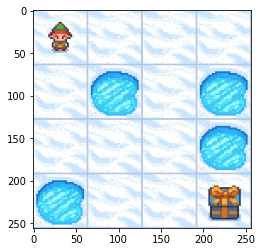

In [6]:
# Source: https://www.kaggle.com/code/sarjit07/reinforcement-learning-using-q-table-frozenlake/notebook
env = gym.make('FrozenLake-v1',is_slippery=False,render_mode='rgb_array')
env.reset()
x=env.render()
plt.imshow(x)

In [7]:
#PI
# Source: https://jacobhiggins.github.io/posts/2020/06/blog-post-1/
def policy_evaluation(P, nS, nA, policy, gamma, tol=1e-3):
  value_function = np.zeros(nS)

  error = 1
  i = 0
  # While error in value function is greater than 1
  while error > tol and i < 100:
    new_value_function = np.zeros(nS)
    # For each state
    for i in range(nS):
      # Get policy for that state
      a = policy[i]
      # With this policy, get next state
      # probability, nextState, reward, terminal = P[i][a]
      # value_function

      # Find all possible transitions, rewards, etc.
      transitions = P[i][a]
      for transition in transitions:
        prob, nextS, reward, term = transition
        # Calculated update value function
        new_value_function[i] += prob*(reward + gamma*value_function[nextS])
    error = np.max(np.abs(new_value_function - value_function)) # Find greatest difference in new and old value function
    # print(new_value_function)
    # print("error: {}".format(error))
    value_function = new_value_function
    i+=1
  if i >= 100:
    print("Policy evaluation never converged. Exiting code.")
    exit()

  ############################
  return value_function

In [8]:
def policy_improvement(P, nS, nA, value_from_policy, policy, gamma):

	new_policy = np.zeros(nS, dtype='int')



	# For each state
	for state in range(nS):
		# Get optimal action
		# If ties for optimal exist, choose random
		Qs = np.zeros(nA)
    # For each action
		for a in range(nA):
			# All possible next states from this state-action pair
			transitions = P[state][a]
			for transition in transitions:
				prob, nextS, reward, term = transition
				Qs[a] += prob*(reward + gamma*value_from_policy[nextS])
    # For this state
		# get maximum Q
		max_as = np.where(Qs==Qs.max())
		max_as = max_as[0]
    # Set new policy to this action that maximizes Q
		new_policy[state] = max_as[0]
        
# 	print("Reward:", reward)
	############################
	return new_policy,reward

In [9]:
def policy_iteration(P, nS, nA, gamma, tol=10e-3):
  value_function = np.zeros(nS)
  policy = 0*np.ones(nS, dtype=int)

  flag = True
  i = 0
  while flag and i < 100:
    value_function = policy_evaluation(P, nS, nA, policy, gamma, tol)
    new_policy, reward = policy_improvement(P, nS, nA, value_function, policy, gamma)
    diff_policy = new_policy-policy

    if np.linalg.norm(diff_policy)==0:
      flag = False
    policy = new_policy
    i+=1

  if(i==100):
    print("Policy iteraction never converged. Exiting code.")
    exit()

    ############################
  return value_function, policy, i+1, reward

In [10]:
gamma = 0.05
iterations = []
gammas = []
times=[]
rewards=[]
for i in range(19):
    start = time.time()
    PI =policy_iteration(env.P,env.observation_space.n, env.action_space.n,gamma, tol=10e-3)
    end = time.time()
    times.append(end-start)
    
    iterations.append(PI[2])
    rewards.append(PI[3])
    gammas.append(gamma)
    gamma = gamma + 0.05
print('PI Avg Wall clock time: ', statistics.mean(times))

PI Avg Wall clock time:  0.0033074178193744862


In [11]:
iterations

[6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

In [12]:
PI

(array([0.77378094, 0.81450625, 0.857375  , 0.81450625, 0.81450625,
        0.        , 0.9025    , 0.        , 0.857375  , 0.9025    ,
        0.95      , 0.        , 0.        , 0.95      , 1.        ,
        0.        ]),
 array([1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0]),
 8,
 0)

In [13]:
# ◀️ LEFT = 0
# 🔽 DOWN = 1
# ▶️ RIGHT = 2
# 🔼 UP = 3
env.action_space.sample()

0

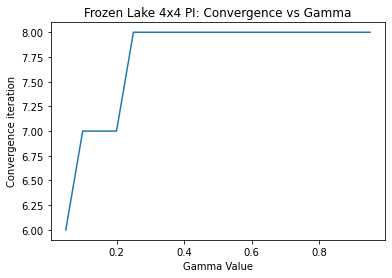

In [14]:
plt.plot(gammas, iterations)
plt.xlabel('Gamma Value')
plt.ylabel('Convergence iteration')
plt.title('Frozen Lake 4x4 PI: Convergence vs Gamma')
# plt.legend()
plt.show()

In [15]:
def value_iteration(P, nS, nA, gamma, tol=1e-3):

	value_function = np.zeros(nS)
	policy = np.zeros(nS, dtype=int)

	# Value iteration is like policy iteration above, except estimation of the value function is done by maximizing over actions
	# After the value function converges, one step is done that find the action that maximizes reward

	error = 1
	# Iterate value function, find optimal
	while error > tol:
		new_value_function = np.zeros(nS)
		for s in range(nS):
			Qs = np.zeros(nA)
			for a in range(nA):
				transitions = P[s][a]
				for transition in transitions:
					prob, nextS, reward, term = transition
					Qs[a] += prob*(reward + gamma*value_function[nextS])
			new_value_function[s] = max(Qs)
		diff_vf = new_value_function-value_function
		value_function = new_value_function
		error = np.linalg.norm(diff_vf)

	# Get policy from value function
	for s in range(nS):
		Qs = np.zeros(nA)
		for a in range(nA):
			transitions = P[s][a]
			for transition in transitions:
				prob, nextS, reward, term = transition
				Qs[a] += prob*(reward + gamma*value_function[nextS])
			max_as = np.where(Qs==Qs.max())
			max_as = max_as[0]
		policy[s] = max_as[0]
        
# 	print(gamma)
	############################
	return value_function, policy, reward

In [16]:
start=time.time()
VI =value_iteration(env.P,env.observation_space.n, env.action_space.n,gamma=.9, tol=10e-3)
end=time.time()
print('VI Avg Wall clock time: ', end-start)

VI Avg Wall clock time:  0.0030515193939208984


In [17]:
gamma = 0.1
# iterations = []
gammas = []
times=[]
rewards=[]
for i in range(10):
    start = time.time()
    VI =value_iteration(env.P,env.observation_space.n, env.action_space.n,gamma, tol=10e-3)
    end = time.time()
    times.append(end-start)
    
#     iterations.append(PI[2])
    rewards.append(PI[2])
    gammas.append(gamma)
    gamma = gamma + 0.1
print('PI Avg Wall clock time: ', statistics.mean(times))

PI Avg Wall clock time:  0.001932215690612793


In [18]:
iterations

[6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

VI Avg Wall clock time:  0.0021390914916992188


Text(0.5, 1.0, 'Frozen Lake 4x4 Value Iteration')

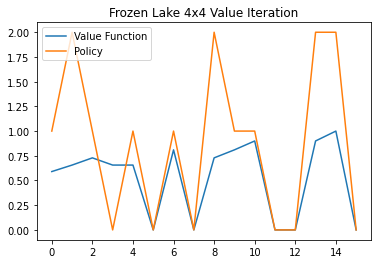

In [19]:
# PI =policy_iteration(env.P,env.observation_space.n, env.action_space.n,gamma=0.9, tol=10e-3)
start=time.time()
VI =value_iteration(env.P,env.observation_space.n, env.action_space.n,gamma=0.9, tol=10e-3)
end=time.time()
print('VI Avg Wall clock time: ', end-start)

# plt.plot(PI[1],label = 'PI policy')
plt.plot(VI[0], label = 'Value Function')
plt.plot(VI[1], label = 'Policy')
plt.legend()
plt.title('Frozen Lake 4x4 Value Iteration')

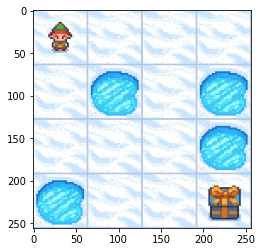

In [20]:
env = gym.make('FrozenLake-v1',is_slippery=True,render_mode='rgb_array')
env.reset()
x=env.render()
plt.imshow(x)

In [21]:
gamma = 0.05
iterations = []
gammas = []
times=[]
rewards=[]
for i in range(17):
#     print(gamma)
    start = time.time()
    PI =policy_iteration(env.P,env.observation_space.n, env.action_space.n,gamma, tol=10e-3)
    end = time.time()
    times.append(end-start)
    
    iterations.append(PI[2])
    rewards.append(PI[3])
    gammas.append(gamma)
    gamma = gamma + 0.05
print('PI Avg Wall clock time: ', statistics.mean(times))

PI Avg Wall clock time:  0.0025437018450568706


In [22]:
iterations

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 6]

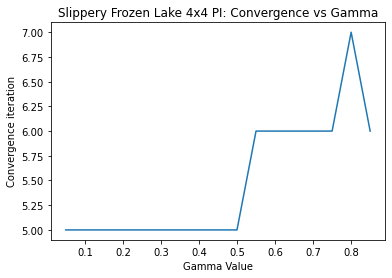

In [23]:
plt.plot(gammas, iterations)
plt.xlabel('Gamma Value')
plt.ylabel('Convergence iteration')
plt.title('Slippery Frozen Lake 4x4 PI: Convergence vs Gamma')
# plt.legend()
plt.show()

VI Avg Wall clock time:  0.004810810089111328


Text(0.5, 1.0, 'Slippery Frozen Lake 4x4 Value Iteration')

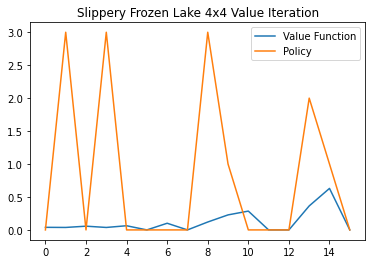

In [24]:
# PI =policy_iteration(env.P,env.observation_space.n, env.action_space.n,gamma=0.9, tol=10e-3)
start=time.time()
VI =value_iteration(env.P,env.observation_space.n, env.action_space.n,gamma=0.9, tol=10e-3)
end=time.time()
print('VI Avg Wall clock time: ', end-start)

# plt.plot(PI[1],label = 'PI policy')
plt.plot(VI[0], label = 'Value Function')
plt.plot(VI[1], label = 'Policy')
plt.legend()
plt.title('Slippery Frozen Lake 4x4 Value Iteration')

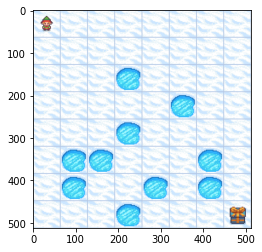

In [25]:
env = gym.make('FrozenLake8x8-v1',is_slippery=False,render_mode='rgb_array')
env.reset()
x=env.render()
plt.imshow(x)

In [26]:
gamma = 0.05
iterations = []
gammas = []
times=[]
rewards=[]
for i in range(19):
    start = time.time()
    PI =policy_iteration(env.P,env.observation_space.n, env.action_space.n,gamma, tol=10e-3)
    end = time.time()
    times.append(end-start)
    
    iterations.append(PI[2])
    rewards.append(PI[3])
    gammas.append(gamma)
    gamma = gamma + 0.05
print('PI Avg Wall clock time: ', statistics.mean(times))

PI Avg Wall clock time:  0.020353329809088456


In [27]:
iterations

[6, 7, 7, 7, 8, 8, 9, 10, 10, 11, 12, 14, 15, 16, 16, 16, 16, 16, 16]

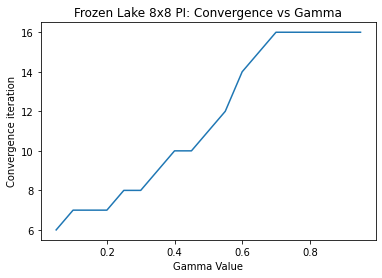

In [28]:
plt.plot(gammas, iterations)
plt.xlabel('Gamma Value')
plt.ylabel('Convergence iteration')
plt.title('Frozen Lake 8x8 PI: Convergence vs Gamma')
# plt.legend()
plt.show()

Avg Wall clock time:  0.01270747184753418


Text(0.5, 1.0, 'Frozen Lake 8x8 Value Iteration')

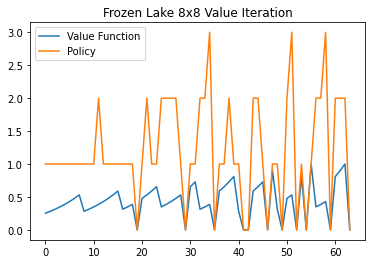

In [29]:
# PI =policy_iteration(env.P,env.observation_space.n, env.action_space.n,gamma=0.9, tol=10e-3)
start = time.time()
VI =value_iteration(env.P,env.observation_space.n, env.action_space.n,gamma=0.9, tol=10e-3)
end = time.time()
print('Avg Wall clock time: ', end-start)

# plt.plot(PI[1],label = 'PI policy')
plt.plot(VI[0], label = 'Value Function')
plt.plot(VI[1], label = 'Policy')
plt.legend()
plt.title('Frozen Lake 8x8 Value Iteration')

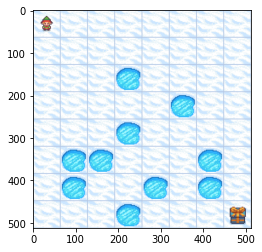

In [30]:
env = gym.make('FrozenLake8x8-v1',is_slippery=True,render_mode='rgb_array')
env.reset()
x=env.render()
plt.imshow(x)

In [31]:
gamma = 0.05
iterations = []
gammas = []
times=[]
rewards=[]
for i in range(19):
    start = time.time()
    PI =policy_iteration(env.P,env.observation_space.n, env.action_space.n,gamma, tol=10e-3)
    end = time.time()
    times.append(end-start)
    
    iterations.append(PI[2])
    rewards.append(PI[3])
    gammas.append(gamma)
    gamma = gamma + 0.05
print('PI Avg Wall clock time: ', statistics.mean(times))

PI Avg Wall clock time:  0.013743036671688682


In [32]:
iterations

[5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 9, 10]

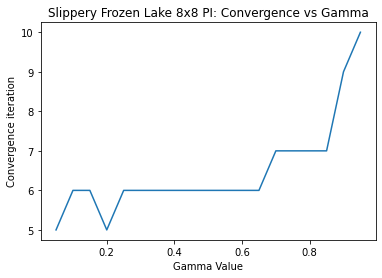

In [33]:
plt.plot(gammas, iterations)
plt.xlabel('Gamma Value')
plt.ylabel('Convergence iteration')
plt.title('Slippery Frozen Lake 8x8 PI: Convergence vs Gamma')
# plt.legend()
plt.show()

VI Avg Wall clock time:  0.0370485782623291


Text(0.5, 1.0, 'Slippery Frozen Lake 8x8 Value Iteration')

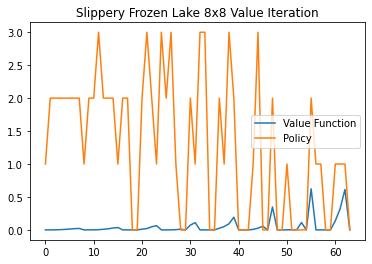

In [34]:
# PI =policy_iteration(env.P,env.observation_space.n, env.action_space.n,gamma=0.9, tol=10e-3)
start=time.time()
VI =value_iteration(env.P,env.observation_space.n, env.action_space.n,gamma=0.9, tol=10e-3)
end=time.time()
print('VI Avg Wall clock time: ', end-start)
# plt.plot(PI[1],label = 'PI policy')
plt.plot(VI[0], label = 'Value Function')
plt.plot(VI[1], label = 'Policy')
plt.legend()
plt.title('Slippery Frozen Lake 8x8 Value Iteration')

In [35]:
#Q-Learning

# Source: https://www.kaggle.com/code/sarjit07/reinforcement-learning-using-q-table-frozenlake/notebook
# Total number of States and Actions

In [36]:
###################### Blackjack ######################

In [37]:
# Source:https://gymnasium.farama.org/tutorials/blackjack_tutorial/

# Let's start by creating the blackjack environment.
# Note: We are going to follow the rules from Sutton & Barto.
# Other versions of the game can be found below for you to experiment.

env = gym.make("Blackjack-v1", sab=True)
# Other possible environment configurations are:

In [38]:
# reset the environment to get the first observation
done = False
observation, info = env.reset()

In [39]:
# The players current sum
# Value of the dealers face-up card
# Boolean whether the player holds a usable ace (An ace is usable if it counts as 11 without busting)
observation

(13, 3, False)

In [40]:
# sample a random action from all valid actions
action = env.action_space.sample()

# execute the action in our environment and receive infos from the environment
observation, reward, terminated, truncated, info = env.step(action)


In [41]:
observation

(21, 3, False)

In [42]:
# Black jack Q-Learner
class BlackjackAgent:
    def __init__(
        self,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate and an epsilon.

        Args:
            learning_rate: The learning rate
            initial_epsilon: The initial epsilon value
            epsilon_decay: The decay for epsilon
            final_epsilon: The final epsilon value
            discount_factor: The discount factor for computing the Q-value
        """
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        # with probability epsilon return a random action to explore the environment
        if np.random.random() < self.epsilon:
            return env.action_space.sample()

        # with probability (1 - epsilon) act greedily (exploit)
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
    ):
        """Updates the Q-value of an action."""
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )

        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - epsilon_decay)

In [43]:
# hyperparameters
learning_rate = 0.01
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

agent = BlackjackAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [44]:
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
times = []
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False
    start=time.time()

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()
    end=time.time()
    times.append(end-start)
print("Avg Wall clock time: ", statistics.mean(times))

100%|███████████████████████████████████| 100000/100000 [00:37<00:00, 2649.23it/s]


Wall clock time:  0.00015334776639938354


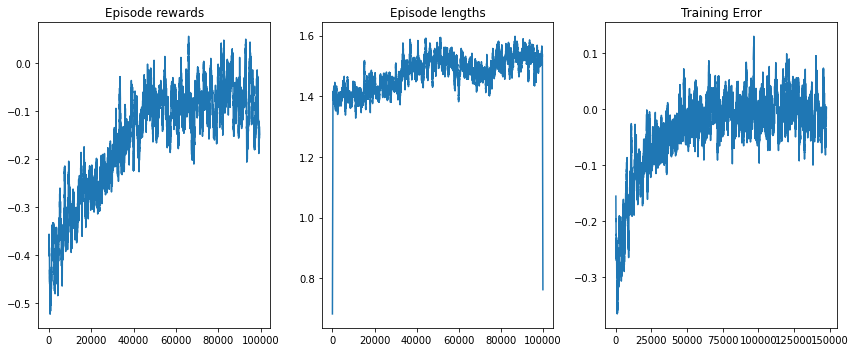

In [45]:
rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))
axs[0].set_title("Episode rewards")
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)
axs[2].set_title("Training Error")
training_error_moving_average = (
    np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="same")
    / rolling_length
)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)
plt.tight_layout()
plt.show()

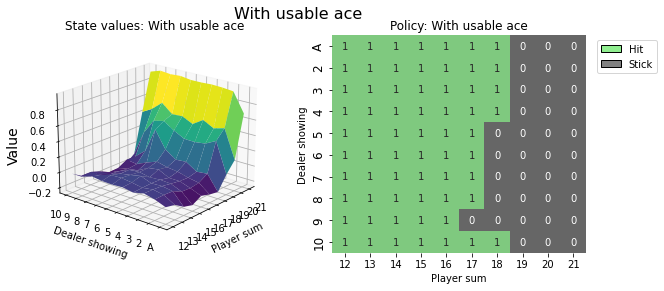

In [46]:
def create_grids(agent, usable_ace=False):
    """Create value and policy grid given an agent."""
    # convert our state-action values to state values
    # and build a policy dictionary that maps observations to actions
    state_value = defaultdict(float)
    policy = defaultdict(int)
    for obs, action_values in agent.q_values.items():
        state_value[obs] = float(np.max(action_values))
        policy[obs] = int(np.argmax(action_values))

    player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.arange(12, 22),
        np.arange(1, 11),
    )

    # create the value grid for plotting
    value = np.apply_along_axis(
        lambda obs: state_value[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    value_grid = player_count, dealer_count, value

    # create the policy grid for plotting
    policy_grid = np.apply_along_axis(
        lambda obs: policy[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    return value_grid, policy_grid


def create_plots(value_grid, policy_grid, title: str):
    """Creates a plot using a value and policy grid."""
    # create a new figure with 2 subplots (left: state values, right: policy)
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)

    # plot the state values
    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot_surface(
        player_count,
        dealer_count,
        value,
        rstride=1,
        cstride=1,
        cmap="viridis",
        edgecolor="none",
    )
    plt.xticks(range(12, 22), range(12, 22))
    plt.yticks(range(1, 11), ["A"] + list(range(2, 11)))
    ax1.set_title(f"State values: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=14, rotation=90)
    ax1.view_init(20, 220)

    # plot the policy
    fig.add_subplot(1, 2, 2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(12, 22))
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)

    # add a legend
    legend_elements = [
        Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
        Patch(facecolor="grey", edgecolor="black", label="Stick"),
    ]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    return fig


# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(agent, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

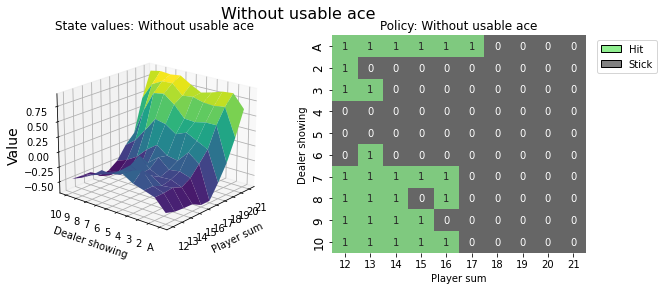

In [47]:
# state values & policy without usable ace (ace counts as 1)
value_grid, policy_grid = create_grids(agent, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()